To whom it may concern,

The following is my code snippet for my application to the Hunter College CSEd program. It is a data analysis project I completed for my data tools and algorithms class. I felt as though this project was apporopriate in demonstrating basic as well as some advanced techniques using python and appropriate statistical libraries to answer the question of how different things influence the chance of bipedalism in different human species. I have included comments to explain the code and the process I used to complete this project. I have cut out the exploratory data analysis section since it makes the file longer than it needs to be as it was just filled with visual characteristcs of the data. 

This project should run easily in any code editor though it is not necessary since the cell outputs are shown. It can also be uploaded to google colab, where it can be ran in case need be.

# Dataset

**The question I want to answer with this analysis is how traits and physical characteristics of different human species, along with their environment influence the presence of bipedalism.**


**The following is taken from the description of the dataset and explains what the dataset is and the meanings of the columns**

In this dataset, we delve into the fascinating story of human evolution. With 12000 rows and 28 columns, this dataset covers a wide range of characteristics of different hominids, from the earliest consensual ancestors to modern Homo sapiens. This comprehensive compilation aims to facilitate the search for relationships between various key variables, thereby providing a more complete and detailed understanding of human evolution.

**About the Data**:

**Genus & Species**: (categorical) This column contains the genus and specific name of the species. It provides taxonomic information about each hominid included in the dataset, allowing for precise identification

**Time** : (categorical) This column indicates the time period during which each hominid species lived. It helps to establish chronological context and understand the temporal distribution of different hominid groups.

**Location**: (categorical) This column records the continent location where each hominid species lived.

**Zone**: (categorical) Describes either east, west, south or north of the continent

**Current Country**: (categorical) Records the modern-day country associated with the location where each hominid species lived, facilitating geographical comparisons.

**Habitat**: (categorical) This column describes the typical habitat or environment inhabited by each hominid species. It provides information about the ecological niche and adaptation strategies of different hominids throughout history.

**Cranial Capacity**: (numeric) This column provides data on the cranial capacity of each hominid species. Cranial capacity is a key indicator of brain size and can offer insights into cognitive abilities and evolutionary trends.

**Height**: (numeric) Describes the average height or stature of each hominid species

**Incisor Size**: (categorical) Indicates the size of the incisors in each hominid species

**Jaw Shape**: (categorical) Describes the shape or morphology of the jaw in each hominid species

**Torus Supraorbital**: (categorical) Specifies the shape or morphology of a supraorbital torus in each hominid species

**Prognathism**: (categorical) Indicates the degree of facial prognathism or protrusion in each hominid species

**Foramen Mágnum Position**: (categorical) Describes the position of the foramen magnum in each hominid species

**Canine Size**: (categorical) Indicates the size of the canines in each hominid species

**Canines Shape**: (categorical) Describes the shape of the canines in each hominid species, providing information about their dietary adaptations and social behavior.

**Tooth Enamel**: (categorical) Specifies the characteristics of tooth enamel in each hominid species, which may indicate aspects of dietary ecology and dental health.

**Tecno**: (categorical) Records the presence or absence of technological advancements

**Tecno Type**: (categorical) Describes the specific type or style of technology associated with each hominid species:
The terms "mode 1," "mode 2," "mode 3," and "mode 4" typically refer to different stone tool industries associated with specific stages of technological development in archaeology. These classifications are part of the Oldowan, Acheulean, Mousterian, and Upper Paleolithic stone tool industries, respectively. Here's a brief explanation of each:

No: it is commonly found that most hominid species never reached the earliest stages of using stone tools.

Mode 1 (Oldowan): This is the earliest stone tool industry, characterized by simple flaked stone tools, typically associated with Homo habilis and early Homo erectus. Oldowan tools include choppers, scrapers, and flakes.

Mode 2 (Acheulean): A more advanced stone tool industry associated with Homo erectus and later hominids, characterized by the production of large, symmetrical handaxes and cleavers. Acheulean tools are more refined than Oldowan tools and demonstrate greater sophistication in tool-making techniques.

Mode 3 (Mousterian): This stone tool industry is associated with Neanderthals and some early Homo sapiens populations. Mousterian tools include flake tools such as points, scrapers, and flakes, often associated with prepared core technologies.

Mode 4 (Upper Paleolithic): This is the most advanced stone tool industry, associated with anatomically modern humans (early Homo sapiens) and characterized by the production of finely crafted tools made from various materials such as bone, antler, and ivory, in addition to stone. Upper Paleolithic tools include blades, burins, and various types of specialized tools for different purposes.

**Biped**: (categorical) Indicates whether each hominid species exhibited bipedal locomotion, a key characteristic distinguishing humans from other primates.

**Arms**: (categorical) Describes the morphology or characteristics of the arms in each hominid species, offering insights into their locomotor adaptations and manual dexterity.

**Foots**: (categorical) Specifies the morphology or characteristics of the feet in each hominid species, providing information about their locomotor adaptations and foot anatomy.

**Diet**: (categorical) Characterizes the dietary habits or preferences of each hominid species

**Sexual Dimorphism**: (categorical) Indicates the degree of sexual dimorphism

**Hip**: (categorical) Describes the size of the hip in each hominid species

**Vertical Front**: (categorical) Specifies the presence or absence of verticality or curvature of the frontal bone in each hominid species, providing information about their cranial morphology.

**Anatomy**: (categorical) Provides additional information about the anatomical features or characteristics of each hominid species, aiding in comprehensive morphological analyses.

**Migrated**: (categorical) Indicates whether each hominid species exhibited migration or movement to different geographical areas, offering insights into their dispersal patterns and population dynamics.

**Skeleton**: (categorical) Describes additional information about anatomy.      

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [27]:
data = pd.read_csv('/content/Evolution_DataSets.csv')
data

,Genus_&_Specie,Time,Location,Zone,Current_Country,Habitat,Cranial_Capacity,Height,Incisor_Size,Jaw_Shape,...,biped,Arms,Foots,Diet,Sexual_Dimorphism,Hip,Vertical_Front,Anatomy,Migrated,Skeleton
0,hominino Orrorin tugenencin,6.041124,Africa,oriental,Kenya,forest,144.51410,110.24323,small,conical,...,low probability,climbing,climbing,dry fruits,high,wide,no,old,no,light
1,hominino Ardipithecus ramidus / kabadda,4.383910,Africa,oriental,Ethiopia,mixed,293.96021,107.69018,small,conical,...,high probability,climbing,climbing,soft fruits,medium-high,wide,no,old,no,light
2,Australopithecus Afarensis,3.749413,Africa,oriental,Kenya,mixed,264.79849,123.76644,big,U shape,...,yes,climbing,walk,dry fruits,high,slim,no,old,no,refined
3,Australopithecus Anamensis,4.595606,Africa,oriental,Kenya,forest-gallery,403.28047,111.40831,big,U shape,...,yes,climbing,climbing,dry fruits,high,wide,no,mixed,no,light
4,Australopithecus Africanus,3.614060,Africa,south,South Africa,forest-gallery,679.15233,111.59004,small,conical,...,yes,climbing,climbing,dry fruits,high,wide,yes,old,no,light
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,Australopithecus Africanus,3.354085,Africa,south,South Africa,forest-gallery,676.92547,112.88961,small,conical,...,yes,climbing,climbing,dry fruits,high,wide,yes,old,no,light
11996,Australopithecus Africanus,3.969730,Africa,south,South Africa,forest-gallery,560.41705,105.13137,small,conical,...,yes,climbing,climbing,dry fruits,high,wide,yes,old,no,light
11997,Homo Floresiensis,0.213857,Asia,oriental,Indonesia,peninsular,222.91130,95.29501,small,U shape,...,modern,climbing,walk,omnivore,medium-high,wide,no,mixed,no,light
11998,Paranthropus Aethiopicus,2.859186,Africa,oriental,Kenya,forest-savanna,466.86762,101.01866,megadony,V shape,...,yes,climbing,climbing,hard fruits,high,wide,no,old,no,robust


 The columns that I am going to remove are Location, Zone, and current country. The reason why I don't want these columns in the data for analysis is because it will make the table more complex and because habitat gives sufficient information of what kind of enviroment the species was living in. The habitat column alone can make up for the information lost by removing location, zone, and current country.

 I've also decided to drop the columns: Sexual_Dimorphism, Vertical_Front,Tooth_Enamal, Migrated. Sexual_dimorphism is just if the appearence between sexes in the species is very distinct. Vertical_Front is just more information regarding the bone structure in the face. Tooth_Enamal is not that important of a characteristic, also there are two other columns relating to teeth. Migrated is not logically a reason for bipedalism, it is an effect of it.  

In [30]:
columns_to_drop = ['Location', 'Zone', 'Current_Country','Sexual_Dimorphism', 'Vertical_Front', 'Tooth_Enamel','Migrated']
data = data.drop(columns=columns_to_drop)

In [31]:
categorical = ['Genus_&_Specie', 'Habitat', 'Incisor_Size', 'Jaw_Shape', 'Torus_Supraorbital', 'Prognathism',
               'Foramen_Mágnum_Position','Canine Size', 'Canines_Shape', 'Tecno', 'Tecno_type',
               'biped', 'Arms','Foots', 'Diet', 'Hip', 'Anatomy', 'Skeleton']

numeric = ['Time', 'Cranial_Capacity', 'Height']

In [32]:
# Time - Cranial Capacity has a correlation of -.66, which is negatively and moderately strong.
# As time increases, cranial capacity decreases, which is something anthropologists have observed.
# https://www.bbc.com/future/article/20220503-why-human-brains-were-bigger-3000-years-ago
# The article above explains why cranial capacity tends to get smaller and it is
# due to us basically not needing to store so much information because we can rely
# on each other, on writing, and now the internet.

# Time - Height has a correlation of -.59, which is negatively and moderately strong.
# As time increases height has been decreasing.
# https://australian.museum/learn/science/human-evolution/how-have-we-changed-since-our-species-first-appeared/#:~:text=We%20are%20now%20generally%20shorter,height%20has%20started%20to%20increase.
# Most human species were moderately short. This was due to nutrition or their climate.
# Us Sapiens were taller, then we got shorter because of poor diets,
# but now we are gaining more height again because of better diversity of food and healthcare.

# Cranial_Capacity - Height has a correlation of .84, which is considered as strong.
# As cranial capacity increases, height increases.
# https://www.sciencedaily.com/releases/2018/05/180514095539.htm
# The article is a recent study that finds taller people generally have more bigger brains.
# I couldn't find any articles about studies on other human species but based on this article,
# and logically thinking about how being bigger likely means a person has genetics or better nutrition than
# most people, it makes sense. I will be doing a hypothesis check to check if this is statistically significant.

data[numeric].corr()

,Time,Cranial_Capacity,Height
Time,1.000000,-0.662638,-0.594751
Cranial_Capacity,-0.662638,1.000000,0.845925
Height,-0.594751,0.845925,1.000000


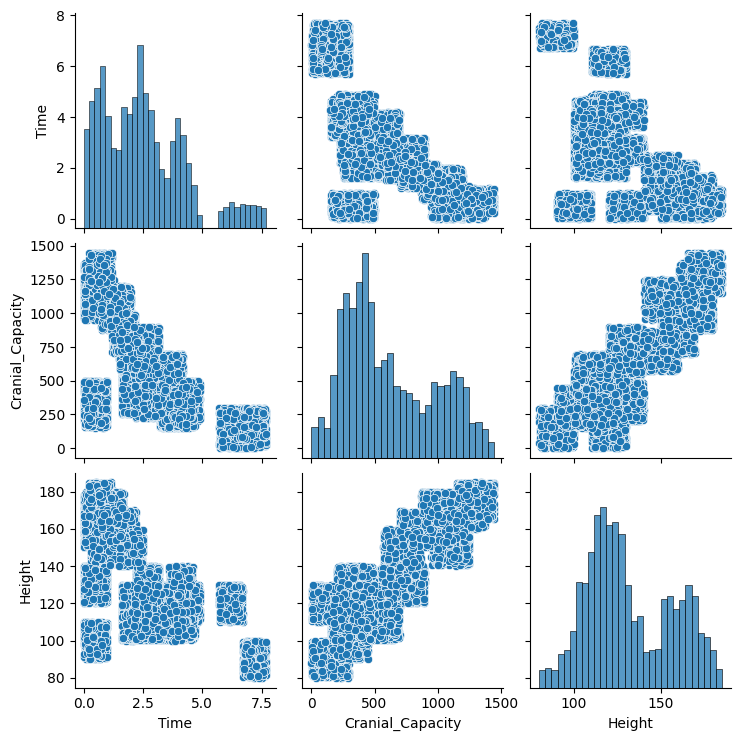

In [33]:
# Just a visualization of the matrix above.
# There are a lot of data points which is why it is so cluttered.
# This visualization is interesting as it reveals groupings in the correlations where there is a negative corr.

sns.pairplot(data[numeric])

Many of the columns should be one-hot encoded later.

**One-Hot:**


* Genus_&_Specie
* Habitat
* Incisor_Size
* Jaw_Shape
* Torus_Supraorbital
* Prognathism
* Foramen_Mágnum_Position
* Canine Size
* Canines_Shape
* Tecno
* Tecno_Type
* Biped
* Arms
* Foots
* Diet
* Hip
* Anatomy
* Skeleton



# High-level Analysis

In [36]:
# 1. Using Pandas to see if there's any information to see influences of characteristics on bipedalism



# Summary statistics for each bipedalism category
for biped_type in data['biped'].unique():
    print(f'Summary stats for biped type: {biped_type}')
    print(data[data['biped'] == biped_type].describe())
    print()

Summary stats for biped type: low probability
              Time  Cranial_Capacity       Height
count  1000.000000       1000.000000  1000.000000
mean      6.693097        150.628199   105.127598
std       0.563387         87.617154    16.190755
min       5.700095          0.074910    80.009030
25%       6.215290         76.365827    89.929220
50%       6.701511        146.929925   104.983640
75%       7.183456        231.025420   120.434865
max       7.699417        299.503600   129.965510

Summary stats for biped type: high probability
             Time  Cranial_Capacity      Height
count  500.000000        500.000000  500.000000
mean     4.191768        300.393117  109.993517
std      0.287294         86.873593    5.634087
min      3.700208        150.641350  100.011320
25%      3.951217        227.530483  105.107612
50%      4.202263        299.149065  109.441105
75%      4.443350        377.954415  115.055610
max      4.699689        449.835200  119.858570

Summary stats for biped

**Low Probability of Bipedalism**

Time: The average time value is 6.69, meaning these species existed earlier in the evolutionary timeline.

Cranial Capacity: The average cranial capacity is 150.63 with high variability, suggesting early hominids with diverse brain sizes.

Height: The average height is 105.13, indicating early hominids were shorter.

**High Probability of Bipedalism**

Time: The average time value is 4.19, indicating these species existed later than those with low probability but still relatively early, since most species were not for sure walking.

Cranial Capacity: The average cranial capacity is 300.39, which is significantly larger than the low probability group.

Height: The average height is 109.99, showing slightly taller statures compared to the low probability group.

**Yes to Bipedalism**

Time: The average time value is 3.07, suggesting these species appeared even later in the evolutionary timeline.

Cranial Capacity: The average cranial capacity is 444.87, indicating a further increase in brain size.

Height: The average height is 117.96, showing an increase in stature.

**Modern Bipedalism**

Time: The average time value is 1.14, indicating these species are the most recent in the timeline.

Cranial Capacity: The average cranial capacity is 886.68, showing a very large brain size typical of modern humans.

Height: The average height is 150.46, indicating the tallest average height among all groups.

In [37]:
# 2. I am curious to see if the correlation calculated for the cranial capacity and height is statistically
# significant.


# Null Hypothesis (H0):
# There is no significant correlation between cranial capacity and height in the population.
# Alternative Hypothesis (H1):
# There is a significant correlation between cranial capacity and height in the population.

# Since the p-value is 0, I reject the null hypothesis
# The data supports the article's findings (https://www.sciencedaily.com/releases/2018/05/180514095539.htm)
# in the positive correlation of cranial capacity and height

# Calculates a Pearson correlation coefficient and p-value
corr_coeff, p_value = stats.pearsonr(data['Cranial_Capacity'], data['Height'])

# Prints the correlation coefficient and p-value
print("Correlation Coefficient:", corr_coeff)
print("P-value:", p_value)

# Determine significance based on p-value
alpha = 0.05
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Correlation Coefficient: 0.8459252276033566
P-value: 0.0
The correlation is statistically significant.


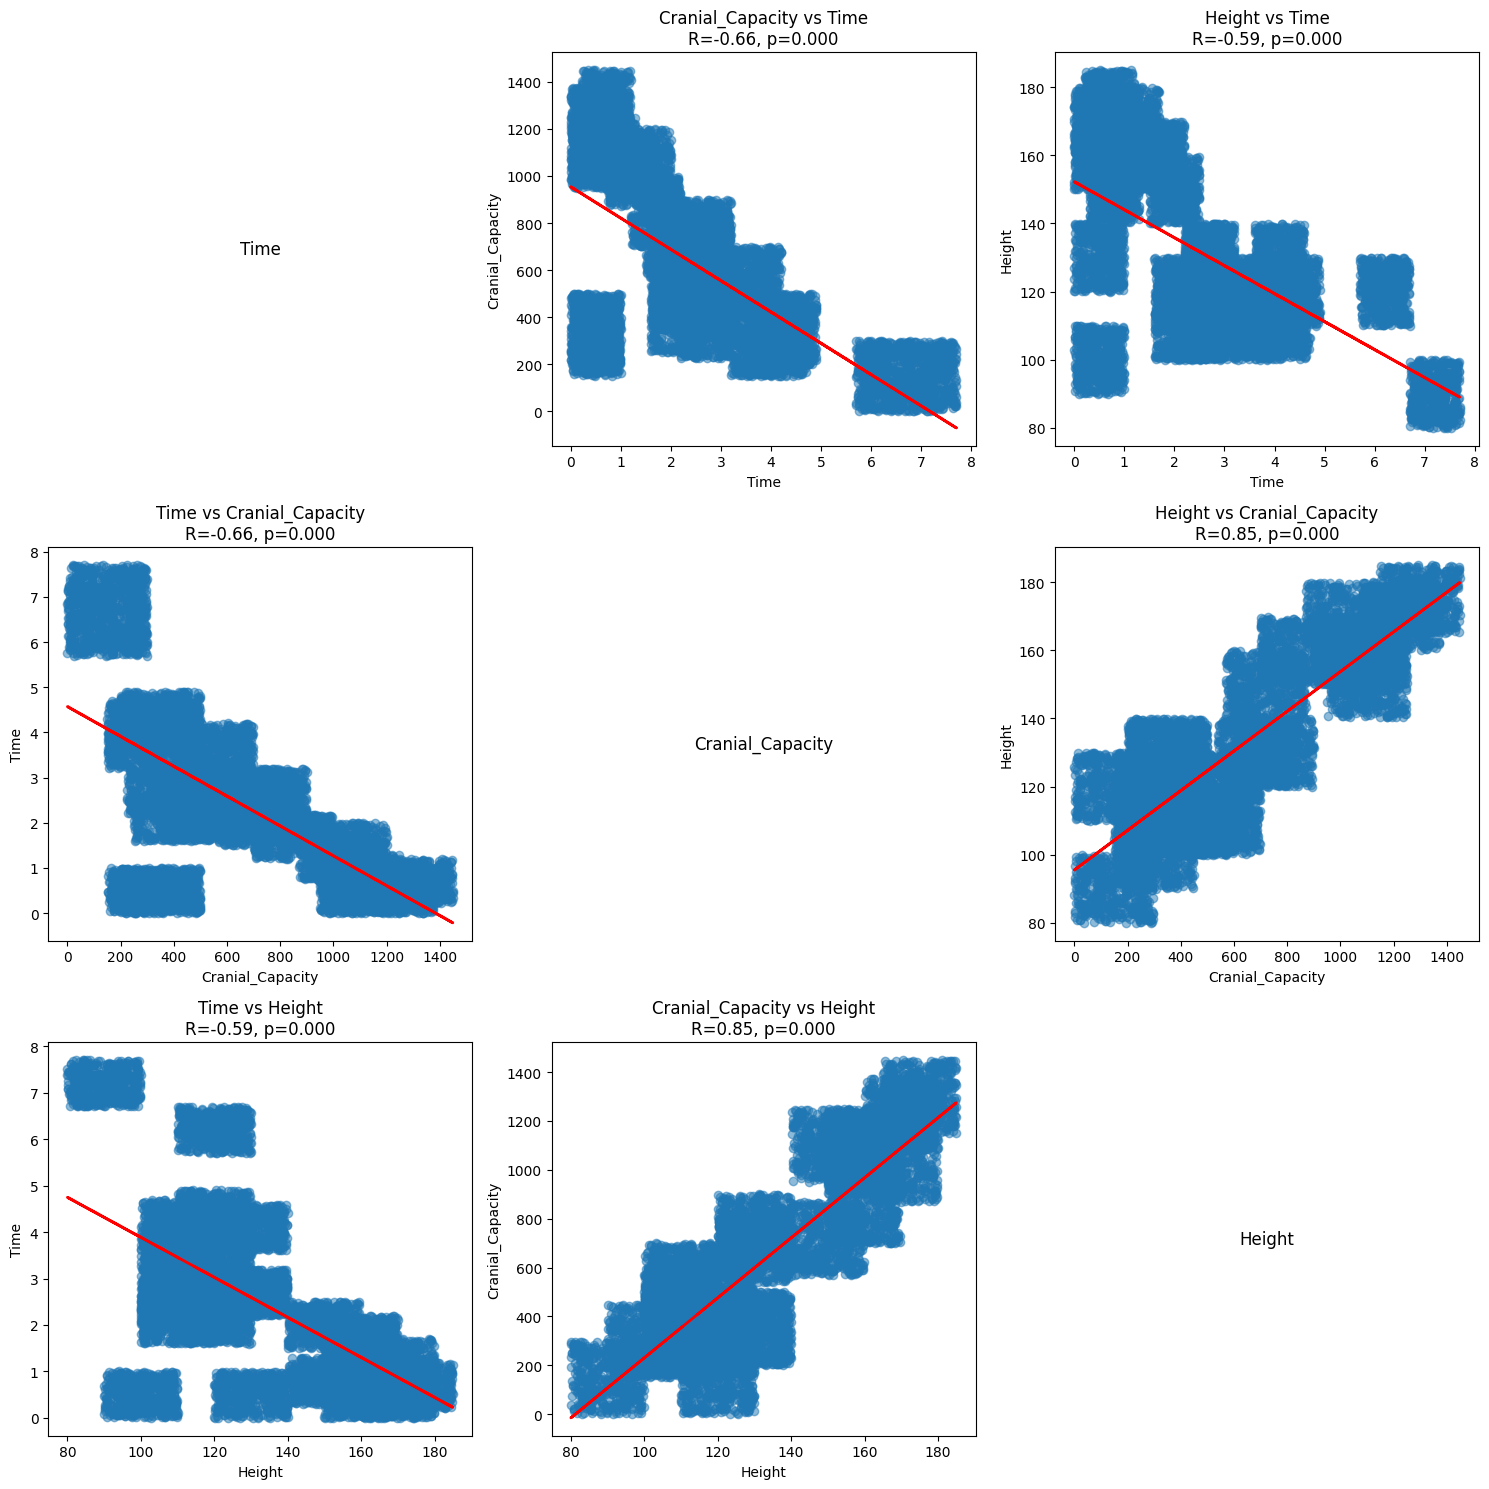

In [38]:
# 3. I want to do a linear regression model on the numeric columns


# Create a figure for the plots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Iterate through pairs of numeric columns
for i, x_col in enumerate(numeric):
    for j, y_col in enumerate(numeric):
        ax = axes[i, j]
        if i != j:
            # Prepare the data
            X = data[x_col]
            y = data[y_col]

            # Create and fit the linear regression model
            slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

            # Predict y values
            y_pred = intercept + slope * X

            # Plot the results
            ax.scatter(X, y, alpha=0.5)
            ax.plot(X, y_pred, color='red', linewidth=2)

            # Set labels
            ax.set_xlabel(x_col)
            ax.set_ylabel(y_col)
            ax.set_title(f'{y_col} vs {x_col}\nR={r_value:.2f}, p={p_value:.3f}')

        else:
            # in place of variables that match, just put the name of the variable
            ax.text(0.5, 0.5, f'{x_col}', fontsize=12, ha='center', va='center')
            ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

# There are clear groupings in the graph. Which I will find later in a cluster analysis.

# The closer time is to 0, the more closer it is to present time.
# There seems to be more species togther the more closer we are to the present time.
# It makes sense that the species are cluttered together as the data comes closer to present time
# because as we know, there weren't huge differences between the many hominid species

# The values of the r-statistic computed show that the numeric columns do have a significant relationship

Going foward I will focus more on trying to see if there are any causes of bipedalism. It requires more data manipulation that I couldn't find the time for before the check-in.

I'm going to do a few chi-squared tests on bipedalism and other cat variables. Also, will be doing a clustering analysis in the end.

In [39]:
# 4. I will do chi-squared tests to see if there is any assocoiation between
# bipedalism and other categorical variables.
# Based on the results of the tests, where the
# null hypothesis is that there is no association between bipedalism and another categorical column
# and the alternative hypothesis is that there is an association between bipedalism and another categorical column.

# Based on the output for the cell, there is significant association between
# bipadalism and almost all of the categorical columns. All of the tests between bipedalism and another cat column
# result in a high computed chi statistic and a low p-value, which gives strong evidence against the null hypothesis.

# A Function to perform chi-squared test. from lecture 11
# Will be called multiple times on different columns.
def chi_squared_test(data, column):
    contingency_table = pd.crosstab(data['biped'], data[column])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    return chi2, p

# A loop to compare the biped column to other cat columns
# A list will contain the column name, the chi statistic and the p-value.
# all other values returned by the chi2_contigency are not important for this analysis
results = []
for column in categorical:
    chi2, p = chi_squared_test(data, column)
    results.append((column, chi2, p))

# Convert results to a DataFrame for better readability
chi_squared_results = pd.DataFrame(results, columns=['Variable', 'Chi-Squared', 'P-Value'])

# Display the results
print(chi_squared_results)

                   Variable   Chi-Squared  P-Value
0            Genus_&_Specie  36000.000000      0.0
1                   Habitat  12650.000000      0.0
2              Incisor_Size   6992.727273      0.0
3                 Jaw_Shape  13227.272727      0.0
4        Torus_Supraorbital   9069.421488      0.0
5               Prognathism  13464.545455      0.0
6   Foramen_Mágnum_Position  22536.363636      0.0
7               Canine Size   4475.015893      0.0
8             Canines_Shape   7680.000000      0.0
9                     Tecno  10439.160839      0.0
10               Tecno_type  10439.160839      0.0
11                    biped  36000.000000      0.0
12                     Arms   8509.090909      0.0
13                    Foots   6880.000000      0.0
14                     Diet  17763.636364      0.0
15                      Hip   8945.454545      0.0
16                  Anatomy   9600.000000      0.0
17                 Skeleton   3281.652893      0.0


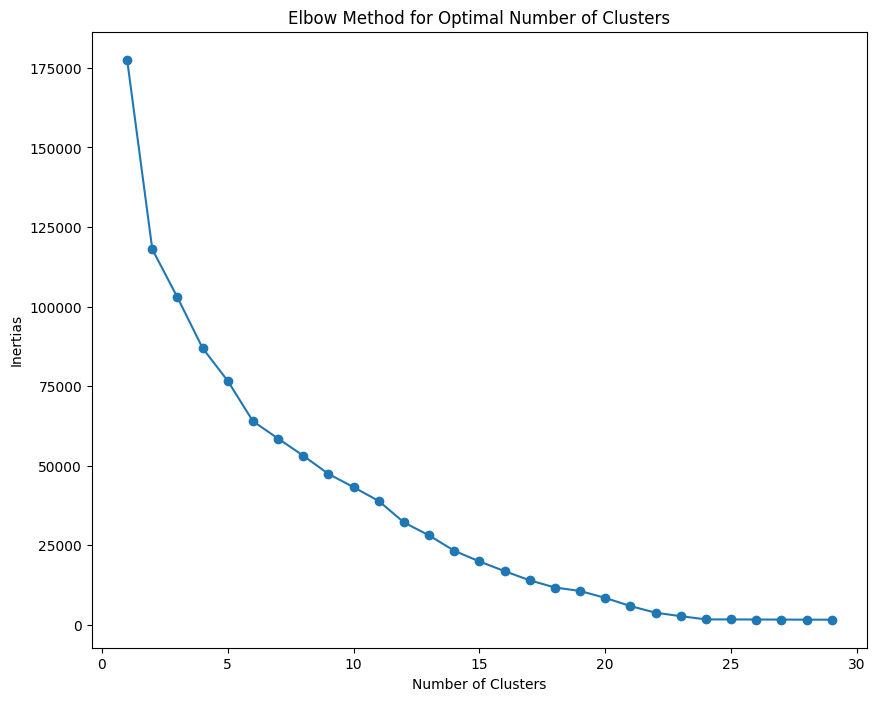

In [40]:
# 5. cluster analysis of the data

# One-Hot Encode the categorical variables
preprocessed_data = pd.get_dummies(data, columns=categorical)

scaler = preprocessing.StandardScaler()
preprocessed_data[numeric] = scaler.fit_transform(preprocessed_data[numeric])
preprocessed_data

inertias = []
# There are 24 species of humans in this dataset
# Though most human species are very similar in features.
# I suspect that the optimal number of clusters will be a low number.
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(preprocessed_data)
    inertias.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 8))
plt.plot(range(1, 30), inertias, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertias')
plt.show()

# The best number of clusters is 3 based off the chart below.
# When looking at previos graphs, like in the correlation between time-height and time-cranial_capacity,
# there seems to be about 2-4 clusters

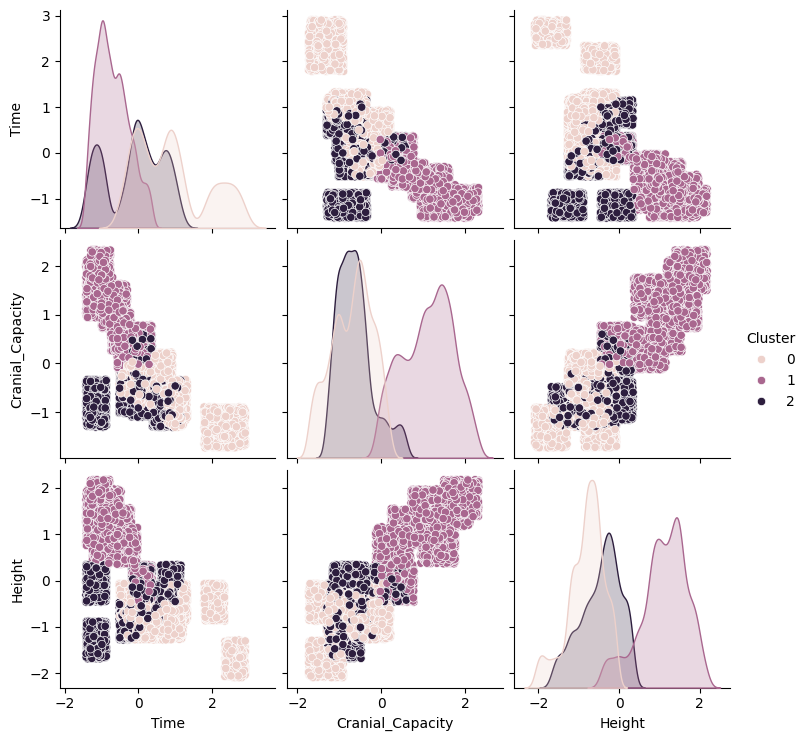

In [41]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42,n_init='auto')
preprocessed_data['Cluster'] = kmeans.fit_predict(preprocessed_data)

# Visualize the clusters with a pairplot
sns.pairplot(preprocessed_data, hue='Cluster', vars=['Time', 'Cranial_Capacity', 'Height'])
plt.show()

In [50]:
species_columns = [
    'Genus_&_Specie_Australopithecus Afarensis',
    'Genus_&_Specie_Australopithecus Africanus',
    'Genus_&_Specie_Australopithecus Anamensis',
    'Genus_&_Specie_Australopithecus Bahrelghazali',
    'Genus_&_Specie_Australopithecus Garhi',
    'Genus_&_Specie_Australopithecus Sediba',
    'Genus_&_Specie_Homo Antecesor',
    'Genus_&_Specie_Homo Erectus',
    'Genus_&_Specie_Homo Ergaster',
    'Genus_&_Specie_Homo Floresiensis',
    'Genus_&_Specie_Homo Georgicus',
    'Genus_&_Specie_Homo Habilis',
    'Genus_&_Specie_Homo Heidelbergensis',
    'Genus_&_Specie_Homo Naledi',
    'Genus_&_Specie_Homo Neanderthalensis\n',
    'Genus_&_Specie_Homo Rodhesiensis',
    'Genus_&_Specie_Homo Rudolfensis',
    'Genus_&_Specie_Homo Sapiens',
    'Genus_&_Specie_Paranthropus Aethiopicus',
    'Genus_&_Specie_Paranthropus Boisei',
    'Genus_&_Specie_Paranthropus Robustus',
    'Genus_&_Specie_hominino Ardipithecus ramidus / kabadda',
    'Genus_&_Specie_hominino Orrorin tugenencin',
    'Genus_&_Specie_hominino Sahelanthropus tchadensis'
]
preprocessed_data.groupby('Cluster')[species_columns].sum()


,Genus_&_Specie_Australopithecus Afarensis,Genus_&_Specie_Australopithecus Africanus,Genus_&_Specie_Australopithecus Anamensis,Genus_&_Specie_Australopithecus Bahrelghazali,Genus_&_Specie_Australopithecus Garhi,Genus_&_Specie_Australopithecus Sediba,Genus_&_Specie_Homo Antecesor,Genus_&_Specie_Homo Erectus,Genus_&_Specie_Homo Ergaster,Genus_&_Specie_Homo Floresiensis,...,Genus_&_Specie_Homo Neanderthalensis\n,Genus_&_Specie_Homo Rodhesiensis,Genus_&_Specie_Homo Rudolfensis,Genus_&_Specie_Homo Sapiens,Genus_&_Specie_Paranthropus Aethiopicus,Genus_&_Specie_Paranthropus Boisei,Genus_&_Specie_Paranthropus Robustus,Genus_&_Specie_hominino Ardipithecus ramidus / kabadda,Genus_&_Specie_hominino Orrorin tugenencin,Genus_&_Specie_hominino Sahelanthropus tchadensis
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0,500,500,0,0,0,0,0,0,0,...,0,0,0,0,500,500,500,500,500,500
1,0,0,0,0,0,0,500,500,500,0,...,500,500,0,500,0,0,0,0,0,0
2,500,0,0,500,500,500,0,0,0,500,...,0,0,500,0,0,0,0,0,0,0


In [17]:
# 6. prediction of bipedalism.
# I am curious to see if a logistic regression model can predict bipedalism from the rest of the columns in the data


cat_no_biped = categorical
cat_no_biped.remove('biped')

In [18]:
preprocessed_data = pd.get_dummies(data, columns=categorical)
preprocessed_data[numeric] = scaler.fit_transform(preprocessed_data[numeric])

# Separate the features and the target variable
X = preprocessed_data.drop('biped', axis=1)
y = preprocessed_data['biped']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

Accuracy: 1.00

Classification Report:
                  precision    recall  f1-score   support

high probability       1.00      1.00      1.00       100
 low probability       1.00      1.00      1.00       200
          modern       1.00      1.00      1.00      1100
             yes       1.00      1.00      1.00      1000

        accuracy                           1.00      2400
       macro avg       1.00      1.00      1.00      2400
    weighted avg       1.00      1.00      1.00      2400



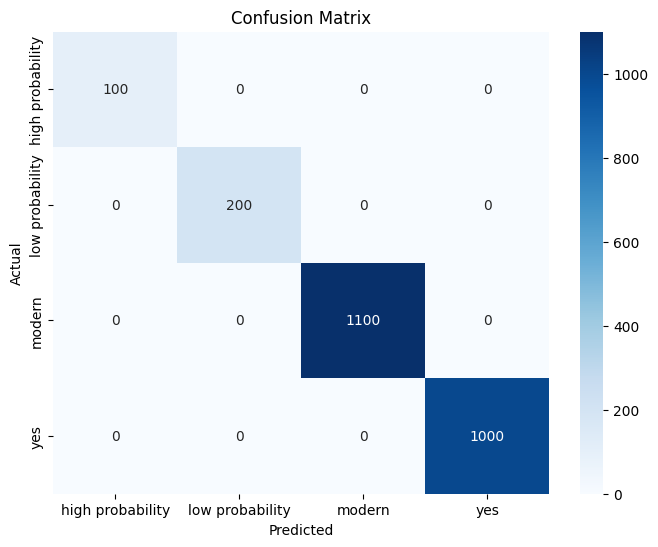

In [20]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate the classification report
class_report = classification_report(y_test, y_pred)
print('\nClassification Report:')
print(class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


The classification was a success, as the model managed to predict bipedalism with 100% accuracy, precision, recall, and f1-score. It seems like all of the columns provided useful information in predicting bipedalism.